In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import re
# import plotly.graph_objects as go
import streamlit as st
import altair as alt
import numpy as np

def prepare_data_for_visualization(df):
    df = df.set_index('Date')
    grouper = df.groupby([pd.Grouper(freq='3D'), 'Game'])
    result = grouper['Game'].count().unstack('Game').fillna(0)
    for column in result.columns:
        result[column] = result[column].cumsum()
    result = result.rename({'Kingdomino ': 'Kingdomino'}, axis=1)
    result = result.resample("3D").pad()
    
    return result

def prepare_data_for_bar_race(df):
    output = df.T.copy()
    
    links = ['https://cf.geekdo-images.com/itemrep/img/hWxcNzC1olqP42dwYGjwW5qGQAs=/fit-in/246x300/pic3376065.jpg',
             'https://cdn.arstechnica.net/wp-content/uploads/2018/07/IMG_4121-800x533.jpg',
             'https://cf.geekdo-images.com/itemrep/img/PxmUXWwfs47siy6d8StJeSb482Q=/fit-in/246x300/pic3714302.jpg',
             'https://cf.geekdo-images.com/itemrep/img/PcS7t2s53VDQwkDpFxVQq_iNv0Y=/fit-in/246x300/pic4059108.jpg',
             'https://res.cloudinary.com/csicdn/image/upload/c_pad,fl_lossy,h_350,q_auto,w_350/v1/Images/Products/Misc%20Art/Czech%20Games%20Edition/full/CGE00040a.jpg',
             'https://cf.geekdo-images.com/itemrep/img/I7L1q58TvT3MWFcp-OqZgIUDdqk=/fit-in/246x300/pic4275250.jpg',
             'https://cf.geekdo-images.com/itemrep/img/VYu3d9_-pmgLdQbykJtp9RKsxZg=/fit-in/246x300/pic3496085.jpg',
             'https://images-na.ssl-images-amazon.com/images/I/91sn9iNwqbL._SX355_.jpg',
             'https://images-cdn.fantasyflightgames.com/filer_public/73/3e/733ee5ab-9728-44f1-8f33-0787f59d8c19/kf01_box_right.png',
             'https://cf.geekdo-images.com/itemrep/img/D3DLTVXuNzL8n2p9BT_2alSfbZs=/fit-in/246x300/pic3132685.png',
             'https://s.s-bol.com/imgbase0/imagebase3/extralarge/FC/3/4/4/8/1004004000008443_7.jpg',
             'https://s.s-bol.com/imgbase0/imagebase3/large/FC/8/9/2/9/9200000079449298.jpg',
             'https://cf.geekdo-images.com/itemrep/img/pdmInB3HR26IwV35yj0LB6bEmD4=/fit-in/246x300/pic3979766.png',
             'https://cf.geekdo-images.com/itemrep/img/7eRwVcLlJ7KOTpGnbcdRJGRlfKk=/fit-in/246x300/pic1949286.jpg',
             'https://s.s-bol.com/imgbase0/imagebase3/large/FC/4/2/2/6/9200000022076224.jpg',
             'https://cf.geekdo-images.com/itemrep/img/8ixto0VaFd6sE11Eoi4olp3Vl9I=/fit-in/246x300/pic2520016.jpg',
             'https://s.s-bol.com/imgbase0/imagebase3/large/FC/6/7/4/4/1004004004574476.jpg',
             'https://www.jolie-spellen.nl/wp/wp-content/uploads/2013/08/rozenkoning-bordspel-white-goblin-games.jpg',
             'https://images-na.ssl-images-amazon.com/images/I/91irtho0CNL._SL1500_.jpg',
             'https://s.s-bol.com/imgbase0/imagebase3/large/FC/1/7/2/3/9200000080483271.jpg',
             'https://i5.walmartimages.com/asr/6a31d2c3-ac74-4557-81ea-0190130f4ec7_1.be08fc7a3334f962ea5b9c318e2d81f1.png?odnHeight=450&odnWidth=450&odnBg=FFFFFF',
             'https://s.s-bol.com/imgbase0/imagebase3/large/FC/7/6/2/6/9200000038446267.jpg',
             'https://cf.geekdo-images.com/itemrep/img/o1PM_RNLP721yNFmZX-SRieWpis=/fit-in/246x300/pic3348790.jpg',
             'https://cf.geekdo-images.com/itemrep/img/gZdBSpXLStMXF5s54qwZ5-5sIuY=/fit-in/246x300/pic646458.jpg',
             'https://images-na.ssl-images-amazon.com/images/I/61TwK9%2BjNUL._SL1000_.jpg',
             'https://cf.geekdo-images.com/itemrep/img/wbRpp7fVHwAbLBrQ3wBnvzUZvRM=/fit-in/246x300/pic3761012.jpg',
             'https://cf.geekdo-images.com/itemrep/img/kB0chg-5_UcxKHtsfrlRhqSWcrU=/fit-in/246x300/pic3042240.jpg']
    output['Image'] = links
    output.columns = [str(column).split(' ')[0] for column in output.columns]
    return output

    
def plot_graph(result, iloc, savefig=False):
    colors = dict(zip(
                ['7 Wonders Duel', 'Azul', 'Claim', 'Claim 2', 'Codenames Duet',
                   'Discover Lands Unknown', 'Fox in the Forest', 'Jaipur', 'KeyForge',
                   'Kingdomino', 'Machiavelli', 'Magic Maze', 'Mind', 'Port Royal',
                   'Qwixx', 'Raptor', 'Regenwormen', 'Rozenkoning', 'Santorini',
                   'Schotten Totten', 'Splendor', 'Sushi Go!', 'Unlock', 'Verboden Eiland',
                   'Vergeten Stad', 'Welcome to…', "What's up"],
                ['#90A4AE', '#E0E0E0', '#A1887F', '#FF8A65',
                 '#FFB74D', '#FFD54F', '#FFF176', '#DCE775',
                 '#AED581', '#81C784', '#4DB6AC', '#4DD0E1',
                 '#4FC3F7', '#64B5F6', '#7986CB', '#9575CD',
                 '#BA68C8', '#F06292', '#e57373', '#4DD0E1',
                 '#4FC3F7', '#64B5F6', '#7986CB', '#9575CD',
                 '#4FC3F7', '#64B5F6', '#7986CB',]
            ))

    names = result.iloc[iloc].sort_values(ascending=True).index[-10:]
    values = result.iloc[iloc].sort_values(ascending=True).values[-10:]


    indices = [i for i, x in enumerate(values) if (x == 0)]
    
    text_names = ["" if i in indices else x for i, x in enumerate(names)]
    text_names = [x if (" " not in x) else x.replace(" ", "\n") for x in text_names]
    text_names = ["Fox in\nthe forest" if x == 'Fox\nin\nthe\nForest' else x for x in text_names]
    
    time = str(result.iloc[iloc].name).split(" ")[0]

    fig, ax = plt.subplots(figsize=(15, 8))
    ax.clear()
    ax.barh(names, values, color=[colors[x] for x in names])
    dx = max(values) / 200

    for i, (value, name) in enumerate(zip(values, text_names)):
        if "\n" in name:
            ax.text(value-dx, i-.3,     name,           size=12, weight=600, ha='right', va='bottom')
        else:
            ax.text(value-dx, i-.1,     name,           size=12, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, "", size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')

    # ... polished styles
    year = "2018"
    ax.text(1, 0.4, time, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Total', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The most popular board games I played in one year',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    plt.box(False)
    plt.tight_layout()
    
    if savefig:
        plt.savefig('images/image_{}.png'.format(iloc), dpi=50)
        plt.close(fig)
        
def extract_players(df):
    """ Extract a list of players"""
    player_list = df.Players.unique()
    player_list = [players.split('+') for players in player_list]
    player_list = list(set([player for sublist in player_list for player in sublist]))
    return player_list

def extract_score(row):
    """ Extract the score per person by checking whether there
    are multiple players in the game which are connected with a 
    + symbol
    """
    scores = str(row.Scores)
    
    if ("+" in scores) and (re.findall("\d+",scores)):
        scores = scores.split("+")
        
        scores_dict = {re.findall("[a-zA-Z]+", score)[0] : 
                       re.findall("\d+", score)[0] for score in scores}

        for player in scores_dict.keys():
            row[player+'_score'] = int(scores_dict[player])

    return row
            
def extract_winner(row, player_list):
    """ Extract the winner(s) per game
    """
    
    winners = str(row.Winner).split("+")
    
    for winner in winners:
        if winner in player_list:
            row[winner+"_winner"] = 1

    return row

def extract_has_score(row, player_list):
    """Check whether the game actually has a score"""
    
    scores = 0
    
    for player in player_list:
        scores += row[player+"_score"]
    
    if scores>0:
        row['has_score'] = 1

    return row

def extract_has_winner(row, player_list):
    """Check whether the game actually has a score"""
    
    for player in player_list:
        if row[player+"_winner"] == 1:
            row['has_winner'] = 1        
            return row

    return row

def extract_has_played(row, player_list):
    """Check whether a person played in the game"""
    played = str(row.Players).split("+")
    
    for player in played:
        if player in player_list:
            row[player+"_played"] = 1

    return row

## Load Data

In [2]:
df = pd.read_excel("https://github.com/MaartenGr/boardgame/blob/master/files/matches.xlsx?raw=true")

In [3]:
df.head()

,Date,Players,Game,Scores,Winner,Version
0,2018-11-18,I+M,Qwixx,I77+M77,I+M,Normal
1,2018-11-18,I+M,Qwixx,I104+M65,I,Normal
2,2018-11-18,I+M,Qwixx,I96+M62,I,Normal
3,2018-11-18,I+M,Mind,LVL10,NaN,Normal
4,2018-11-18,I+M,Mind,LVL4,NaN,Normal


In [19]:
# df = pd.read_excel("files/matches.xlsx")

## Prepare Data for Exploration

In [3]:
player_list = extract_players(df); player_list
for player in player_list:
    df[player+"_score"] = 0
    df[player+"_winner"] = 0
    df[player+"_played"] = 0
df['has_score'] = 0
df['has_winner'] = 0

df = df.apply(lambda row: extract_score(row), 1)
df = df.apply(lambda row: extract_winner(row, player_list), 1)
df = df.apply(lambda row: extract_has_score(row, player_list), 1)
df = df.apply(lambda row: extract_has_winner(row, player_list), 1)
df = df.apply(lambda row: extract_has_played(row, player_list), 1)
df['Nr_players'] = df.apply(lambda row: len(str(row.Players).split("+")), 1)

In [87]:
df.to_csv("files/boardgame_new.csv")

In [5]:
player_list

['PA', 'MA', 'E', 'I', 'WO', 'EV', 'G', 'DA', 'M', 'C', 'IR']

In [7]:
select_player = "M"
grouped = df.loc[(df.has_score==1) &
                 (df.has_winner==1) &
                 (df[select_player+"_played"]==1), :]
selection = grouped.groupby("Game").mean()[[select_player+'_score']].reset_index()

In [5]:
from vega_datasets import data


In [15]:
df.head()

,Date,Players,Game,Scores,Winner,Version,G_score,G_winner,G_played,DA_score,...,WO_winner,WO_played,E_score,E_winner,E_played,MA_score,MA_winner,MA_played,has_score,has_winner
0,2018-11-18,I+M,Qwixx,I77+M77,I+M,Normal,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,2018-11-18,I+M,Qwixx,I104+M65,I,Normal,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,2018-11-18,I+M,Qwixx,I96+M62,I,Normal,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,2018-11-18,I+M,Mind,LVL10,NaN,Normal,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2018-11-18,I+M,Mind,LVL4,NaN,Normal,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Stats Ideas
(1) The longest time between games  
(2) The longest time between games per person?  
(3) The most games played on a day  
(4) The most games played on a day by person  
(5) Longest subsequent number of days played  

In [ ]:
most_games_day = 0
most_games_day_person = 0
# with these and these players, on this date where X won the most games

In [239]:
grouped_date = df.groupby("Date").count()
most_games_idx = grouped_date.Players.to_numpy().argmax()
most_games = grouped_date.Players.to_numpy().max()
date = grouped_date.index[most_games_idx]

In [256]:
played = [column for column in df.columns if "_played" in column]
played = df.loc[df.Date == date, played]
played_idx = np.where(to_do.any(axis=0))[0]
players = [player.split("_")[0] for player in played.columns[played_idx]]

In [103]:
player_one = "I"
player_two = "M"
player_one_won = 5
player_two_won = 4

In [109]:
to_plot = pd.DataFrame([[player_one_won, player_one],
                        [player_two_won, player_two]], columns=['Player', 'Results'])

In [110]:
to_plot

,Player,Results
0,5,I
1,4,M


In [95]:
selection.head()

,Date,Players,Game,Scores,Winner,Version,MA_score,MA_winner,MA_played,C_score,...,E_played,IR_score,IR_winner,IR_played,EV_score,EV_winner,EV_played,has_score,has_winner,Nr_players
0,2018-11-18,I+M,Qwixx,I77+M77,I+M,Normal,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2
1,2018-11-18,I+M,Qwixx,I104+M65,I,Normal,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2
2,2018-11-18,I+M,Qwixx,I96+M62,I,Normal,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2
7,2018-11-22,I+M,Qwixx,I96+M78,I,Normal,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2
8,2018-11-22,I+M,Qwixx,I48+M54,M,Normal,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2


In [50]:
player_one = "M"
player_two = "I"

games = df.loc[(df[player_one + "_played"] == 1) &
               (df[player_two + "_played"] == 1) &
               (df["Nr_players"] == 2), :]
player_one_won = len(games[games[player_one + "_winner"] == 1])
player_two_won = len(games[games[player_two + "_winner"] == 1])
to_plot = pd.DataFrame([[player_one_won, player_one],
                        [player_two_won, player_two]], columns=['Results', 'Player'])


In [104]:
player_one = 'I'
player_two = 'M'
game = 'Qwixx'
selection = df.loc[(df.Game==game) &
                   (df[player_one + '_played'] == 1) &
                   (df[player_two + '_played'] == 1) , :]

player_one_vals = list(selection[player_one + '_score'].values)
player_two_vals = list(selection[player_two + '_score'].values)
vals = player_one_vals + player_two_vals
player_indices = [player_one if i < len(player_one_vals) else player_two for i, _ in enumerate(vals)]
indices = list(np.arange(len(vals)/2))
indices = indices + indices

to_plot = pd.DataFrame(np.array([indices, vals, player_indices]).T, columns=['Indices', 'Scores', 'Players'])
to_plot.Indices = to_plot.Indices.astype(float)
to_plot.Scores = to_plot.Scores.astype(float)

In [106]:
result = pd.DataFrame(columns=['Player', 'Game', 'Avg', 'Min', 'Max', 'Number'])

for player in [player_one, player_two]:
        values = selection.loc[(selection[player + "_played"] == 1), player + "_score"].values
        result.loc[len(result), :] = [player, game, round(np.mean(values)), min(values),
                                      max(values), len(values)]

In [107]:
result

,Player,Game,Avg,Min,Max,Number
0,I,Qwixx,86,22,172,66
1,M,Qwixx,74,21,308,66


In [109]:
test = ['ba', 'bc', 'ac']

In [110]:
test.sort()

In [111]:
test

['ac', 'ba', 'bc']

In [ ]:
alt.Chart(source).mark_bar().encode(
    x='Player:Q',
    y='year:O',
    color='year:N',
    row='site:N'
)

In [98]:
to_plot.dtypes

Indices    float64
Scores     float64
Players     object
dtype: object

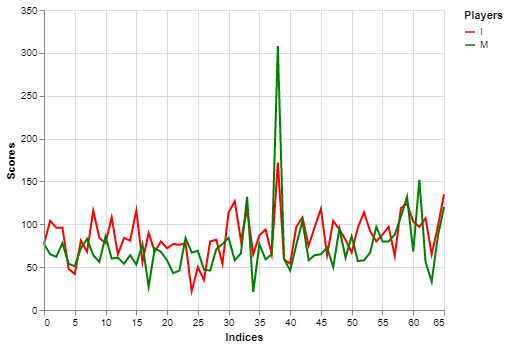

In [102]:
colors = ['red', 'green']
alt.Chart(to_plot).mark_line().encode(
    x='Indices:Q',
    y='Scores:Q',
    color=alt.Color('Players', scale=alt.Scale(range=colors))
)

In [13]:
df.Game.unique()

array(['Qwixx', 'Mind', 'KeyForge', 'Sushi Go!', 'Jaipur',
       'Schotten Totten', 'Splendor', 'Rozenkoning',
       'Discover Lands Unknown', 'Santorini', 'Claim', 'Kingdomino ',
       'Verboden Eiland', '7 Wonders Duel', "What's up", 'Unlock',
       'Claim 2', 'Port Royal', 'Vergeten Stad', 'Fox in the Forest',
       'Welcome to…', 'Raptor', 'Regenwormen', 'Machiavelli',
       'Magic Maze', 'Azul', 'Codenames Duet'], dtype=object)

In [15]:
selected_game = 'Magic Maze'
selection = df.loc[(df.Game == selected_game), :]
score_selection = selection.loc[:, [column for column in selection.columns if ('score' in column) & ('has_score' not in column)]]



In [35]:
df.loc[(df.Game == 'Codenames Duet')&
       (), 'has_score'].values

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  


In [37]:
is_loaded_header = st.sidebar.subheader("⭕️ Data not loaded")


In [38]:
type(is_loaded_header)

streamlit.DeltaGenerator.DeltaGenerator

## Altair

In [6]:
selection.head()

,Game,M_score
0,7 Wonders Duel,52.000000
1,Azul,57.333333
2,Claim,2.250000
3,Claim 2,3.000000
4,Fox in the Forest,18.250000


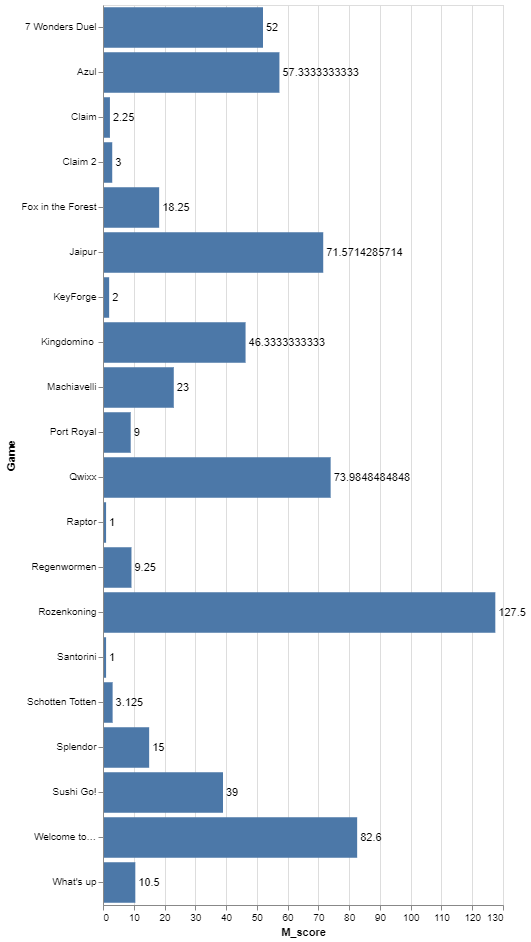

In [22]:
source = data.wheat()

bars = alt.Chart(selection).mark_bar().encode(
    x='M_score:Q',
    y="Game:O"
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='M_score:Q'
)

(bars + text).properties(height=900)

In [8]:
df.columns

Index(['Date', 'Players', 'Game', 'Scores', 'Winner', 'Version', 'IR_score',
       'IR_winner', 'IR_played', 'M_score', 'M_winner', 'M_played', 'G_score',
       'G_winner', 'G_played', 'E_score', 'E_winner', 'E_played', 'PA_score',
       'PA_winner', 'PA_played', 'DA_score', 'DA_winner', 'DA_played',
       'EV_score', 'EV_winner', 'EV_played', 'C_score', 'C_winner', 'C_played',
       'MA_score', 'MA_winner', 'MA_played', 'I_score', 'I_winner', 'I_played',
       'WO_score', 'WO_winner', 'WO_played', 'has_score', 'has_winner'],
      dtype='object')

In [7]:
player = "M"
selected_game = "Qwixx"
selection = df.loc[df[player+"_played"]==1, :]
selection = selection.loc[(selection.Game == selected_game), :]

In [8]:
selection.head()

,Date,Players,Game,Scores,Winner,Version,IR_score,IR_winner,IR_played,C_score,...,DA_winner,DA_played,E_score,E_winner,E_played,MA_score,MA_winner,MA_played,has_score,has_winner
0,2018-11-18,I+M,Qwixx,I77+M77,I+M,Normal,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,2018-11-18,I+M,Qwixx,I104+M65,I,Normal,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,2018-11-18,I+M,Qwixx,I96+M62,I,Normal,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
7,2018-11-22,I+M,Qwixx,I96+M78,I,Normal,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
8,2018-11-22,I+M,Qwixx,I48+M54,M,Normal,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


## Bar Race

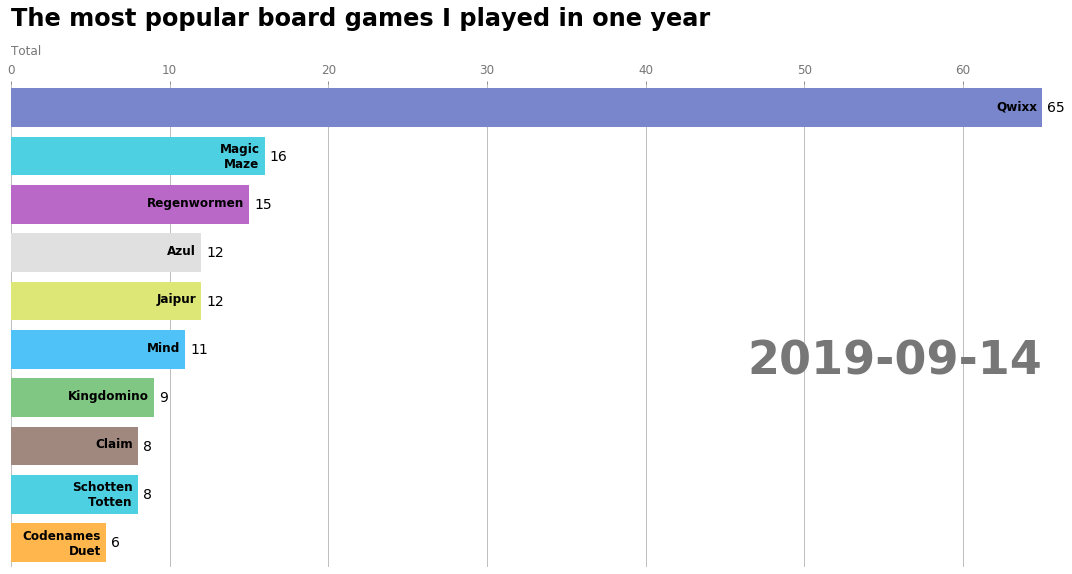

In [109]:
df_viz = prepare_data_for_visualization(df)
output = prepare_data_for_bar_race(df_viz)
plot_graph(result, 100)